In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
%matplotlib inline

In [11]:
dj = pd.read_csv('DJIA-Data.csv')
dj.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DD,XOM,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
0,6.09,6.30,12.70,1.13,20.44,-3.08,8.63,-3.46,11.15,-1.20,...,7.93,-1.11,-5.50,-1.47,2.19,7.20,-6.13,-0.87,2.68,3.73
1,1.03,5.48,18.83,1.04,4.66,5.82,1.22,3.44,-0.06,3.30,...,3.77,-1.31,7.27,-0.57,7.65,7.05,1.19,15.62,-3.72,7.94
2,1.84,9.40,10.53,-0.77,-6.73,-1.75,6.39,5.95,4.02,0.27,...,0.48,7.20,-0.61,2.12,5.72,-1.11,0.31,1.41,3.59,4.26
3,0.17,4.06,-2.59,3.27,-3.52,-0.61,-4.68,3.11,1.05,-0.45,...,3.17,1.15,-5.31,8.65,-4.73,-1.57,5.62,4.24,-3.74,-1.53
4,-5.54,-7.27,-1.08,-9.36,-14.74,-7.74,-19.00,-2.07,-9.71,-8.93,...,-3.29,-4.50,-2.12,-2.85,-0.68,-9.22,3.12,-6.34,11.73,6.03


In [12]:
dj.columns

Index([u'MMM', u'AXP', u'AAPL', u'BA', u'CAT', u'CVX', u'CSCO', u'KO', u'DD',
       u'XOM', u'GE', u'GS', u'HD', u'IBM', u'INTC', u'JNJ', u'JPM', u'MCD',
       u'MRK', u'MSFT', u'NKE', u'PFE', u'PG', u'TRV', u'UNH', u'UTX', u'VZ',
       u'V', u'WMT', u'DIS'],
      dtype='object')

In [22]:
nStocks = len(dj.columns)
nStocks

30

In [36]:
sample_mean_vector = dj.mean()
sample_mean_vector

MMM     1.389500
AXP     0.926500
AAPL    1.430500
BA      1.426500
CAT     0.278667
CVX     0.312000
CSCO    1.088500
KO      0.360500
DD      1.142833
XOM     0.192500
GE      1.065833
GS      1.907500
HD      2.061333
IBM    -0.047000
INTC    0.849333
JNJ     1.011333
JPM     1.840667
MCD     0.391000
MRK     0.849667
MSFT    1.668500
NKE     1.411667
PFE     0.772333
PG      0.460333
TRV     1.327000
UNH     2.052000
UTX     0.798667
VZ      0.585167
V       2.010000
WMT     0.349333
DIS     1.847833
dtype: float64

In [66]:
sample_cov_matrix = dj.cov()
sample_cov_matrix

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DD,XOM,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
MMM,16.051530,9.990780,11.510105,10.211007,12.265903,11.803618,13.582969,6.050319,17.001078,11.456781,...,6.094419,7.898257,7.099212,12.360798,7.209247,13.460737,3.900028,8.676076,2.517334,10.858599
AXP,9.990780,33.140576,11.664092,16.264694,16.351577,10.909116,16.926376,5.286522,21.420868,7.816307,...,5.352867,6.569352,0.779888,8.201991,7.752500,13.904938,-2.530693,12.033115,-2.819018,12.920187
AAPL,11.510105,11.664092,54.370493,10.296583,13.425575,9.168655,18.294531,9.023008,18.426390,5.463463,...,5.122928,2.756219,6.639571,8.967510,9.376685,10.049621,2.442640,9.988869,3.997602,11.831325
BA,10.211007,16.264694,10.296583,33.331504,6.720653,9.292277,12.167551,8.474793,22.175112,6.615872,...,8.225826,9.735759,1.812503,11.018359,7.103714,13.376197,3.400405,11.779185,-0.380743,13.497963
CAT,12.265903,16.351577,13.425575,6.720653,49.398968,18.352148,18.467452,1.135745,25.142360,13.246090,...,1.701779,3.864742,3.520446,6.902489,5.777401,18.766047,0.373009,4.758264,-6.553506,10.336258
CVX,11.803618,10.909116,9.168655,9.292277,18.352148,29.403552,10.605457,6.725358,20.738891,18.370605,...,-2.884737,7.153697,8.042279,11.607437,5.767893,13.146904,7.035901,5.432163,-1.905863,13.963060
CSCO,13.582969,16.926376,18.294531,12.167551,18.467452,10.605457,46.733766,5.141936,27.094082,8.070690,...,5.207796,6.573127,5.314389,9.545117,8.606110,18.804405,-1.184907,12.189169,-4.019454,10.972756
KO,6.050319,5.286522,9.023008,8.474793,1.135745,6.725358,5.141936,15.640842,8.336836,5.838756,...,4.789431,6.848699,6.684666,10.094674,0.515674,2.791523,9.514847,7.159478,6.910163,8.458355
DD,17.001078,21.420868,18.426390,22.175112,25.142360,20.738891,27.094082,8.336836,55.792021,14.798125,...,8.142797,11.867892,4.580426,13.919095,7.395938,24.819868,5.293346,9.658458,-5.090422,20.687010
XOM,11.456781,7.816307,5.463463,6.615872,13.246090,18.370605,8.070690,5.838756,14.798125,17.826656,...,-2.713984,6.721460,6.538942,9.531648,5.019207,10.129461,5.965392,5.773919,-0.568464,10.654706


In [23]:
weights = np.random.random(nStocks)
weights /= np.sum(weights)
weights

array([ 0.01680966,  0.05599551,  0.01620779,  0.04381618,  0.01598261,
        0.05998483,  0.05091698,  0.02698835,  0.05507399,  0.03759066,
        0.04985342,  0.05471011,  0.02152968,  0.01366611,  0.04024199,
        0.02906402,  0.00529136,  0.05177775,  0.01513012,  0.04213441,
        0.02391731,  0.02370134,  0.05940837,  0.05628266,  0.00027727,
        0.01287674,  0.05560409,  0.02367561,  0.02842895,  0.01306216])

In [24]:
'''
Check if the sum of the weights is 1
'''
print(sum(weights) == 1)

True


In [37]:
'''
Expected Portfolio return
'''
epr = np.sum(weights * sample_mean_vector)
epr

0.9765203538311176

In [42]:
'''
Portfolio Variance
'''
pv = np.dot(weights.T, np.dot(sample_covariance_matrix, weights))
pv

10.07946636275927

In [67]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(sample_mean_vector * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(sample_cov_matrix, weights)))
    return np.array([pret, pvol, pret / pvol])

In [70]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [69]:
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})
bnds = tuple((0, 1) for x in range(nStocks))

In [71]:
opts = sco.minimize(min_func_sharpe, nStocks * [1. / nStocks,], method='SLSQP',
                    bounds=bnds, constraints=cons)

In [72]:
opts

     fun: -0.60174541164208339
     jac: array([  5.18026277e-02,   2.68139198e-01,   1.52809255e-01,
         8.84625018e-02,   3.10427554e-01,   2.72100285e-01,
         2.79124811e-01,   2.12375790e-01,   2.78683536e-01,
         2.54259728e-01,   1.04531914e-01,   1.86441764e-02,
         2.08519399e-04,   3.22174348e-01,   1.51392639e-01,
        -4.97855246e-04,   9.39605385e-02,   2.18662821e-01,
         2.60776430e-02,   8.03411007e-04,  -2.01776624e-04,
         1.97982982e-01,   1.85121767e-01,   1.23732843e-01,
        -4.17210162e-04,   2.51708753e-01,   2.04999000e-03,
         5.99928200e-04,  -2.15835869e-04,   5.01412749e-02,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 226
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.30017946e-16,   0.00000000e+00,
         0.00000000e+00,   1.89401085e-16,   0.00000000e+00,
         0.0000

In [73]:
statistics(opts['x']).round(3)

array([ 1.744,  2.898,  0.602])

In [74]:
def min_func_variance(weights):
    return statistics(weights)[1]**2

In [75]:
optv = sco.minimize(min_func_variance, nStocks * [1. / nStocks,], method='SLSQP',
                   bounds=bnds, constraints=cons)

In [76]:
optv

     fun: 5.1554287640072118
     jac: array([ 12.9849357 ,  10.31051195,  12.23218298,  11.66639352,
        10.31095588,  11.89766783,  10.75794518,  11.50596058,
        15.12787658,  10.31094033,  13.54789108,  12.3767007 ,
        11.55621833,  10.31095761,  10.93840349,  10.94135356,
        12.65585953,  10.3106451 ,  10.31068331,  10.31081957,
        10.31004328,  11.99795049,  10.31108648,  14.53467703,
        10.31127149,  10.66822273,  10.31119961,  10.31064081,
        10.31115359,  15.3362931 ,   0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 689
     nit: 21
    njev: 21
  status: 0
 success: True
       x: array([  0.00000000e+00,   4.57045021e-02,   0.00000000e+00,
         1.12291262e-15,   2.18168503e-02,   0.00000000e+00,
         1.40405952e-15,   4.28590078e-16,   0.00000000e+00,
         1.10767687e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.21736456e-02,   3.96200743e-16,
         0.00000000e+00,   1.01373885e

In [77]:
statistics(optv['x']).round(3)

array([ 0.838,  2.271,  0.369])

In [78]:
def min_func_port(weights):
    return statistics(weights)[1]

In [81]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(nStocks)
    weights /= np.sum(weights)
    prets.append(np.sum(sample_mean_vector * weights))
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(sample_cov_matrix, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

In [82]:
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type':'eq', 'fun':lambda x: statistics(x)[0] - tret},
           {'type':'eq', 'fun':lambda x: np.sum(x) - 1})
    res = sco.minimize(min_func_port, nStocks*[1./nStocks,],method='SLSQP',
                      bounds = bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

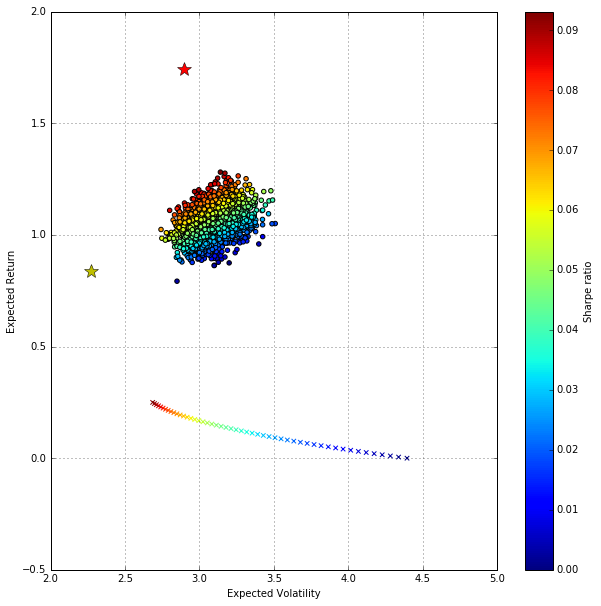

In [86]:
plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets /pvols, marker='o')
plt.scatter(tvols, trets, c=trets /tvols, marker='x')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0)
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe ratio')